In [127]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings("ignore")

In [128]:
df  = pd.read_csv("insurance.csv")

In [129]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [130]:
df.shape

(1338, 7)

In [131]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [133]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [134]:
# data cleaning
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [135]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

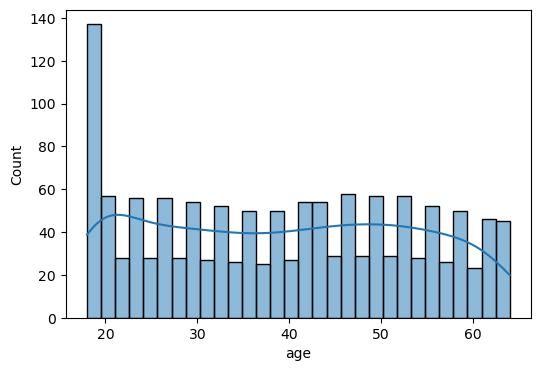

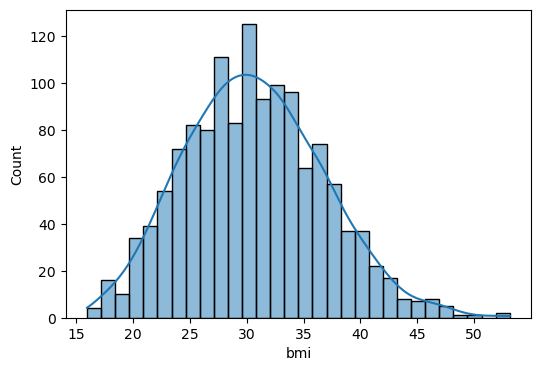

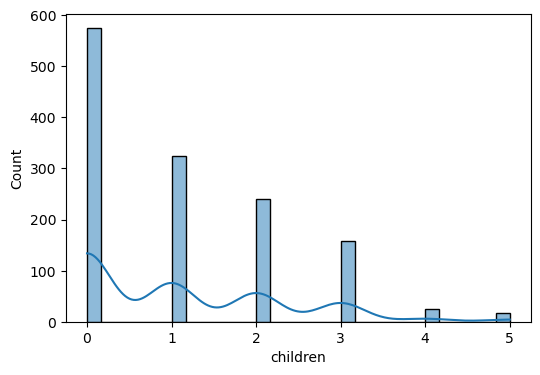

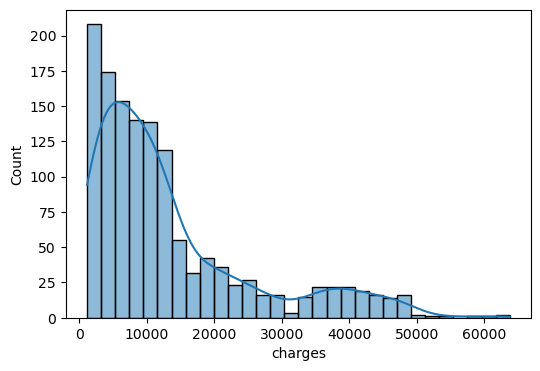

In [136]:
numeric_columns = ['age', 'bmi',"children" , 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col] , kde=True , bins=30)

<Axes: xlabel='children', ylabel='count'>

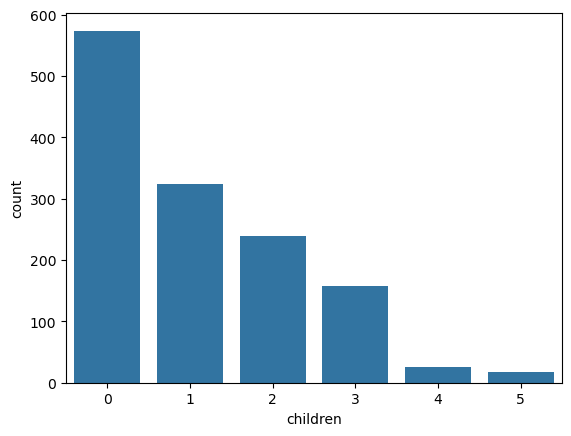

In [137]:
sns.countplot(x=df["children"])


<Axes: xlabel='sex', ylabel='count'>

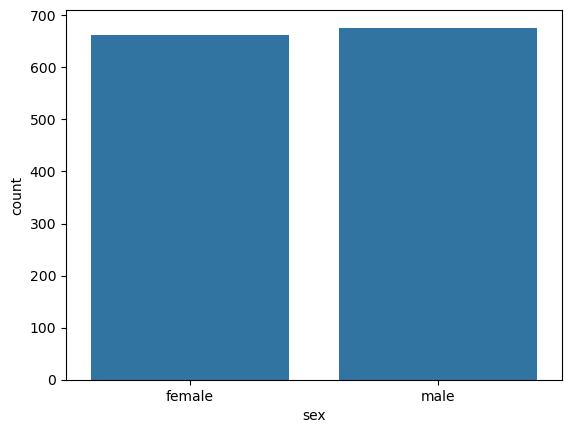

In [138]:
sns.countplot(x=df["sex"])


<Axes: xlabel='smoker', ylabel='count'>

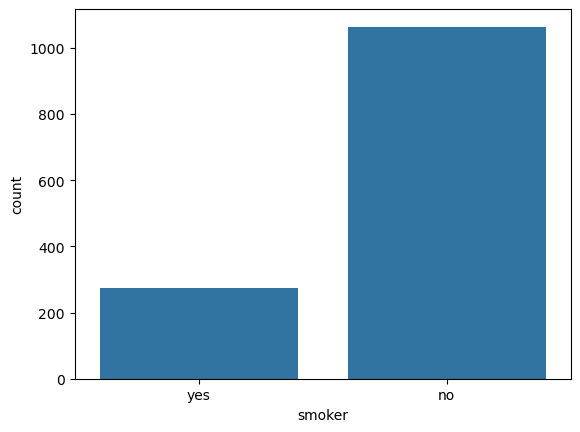

In [139]:
sns.countplot(x=df["smoker"])

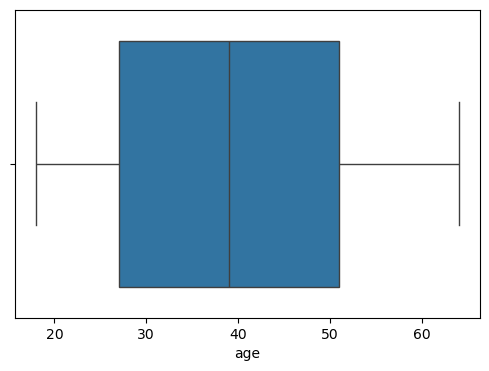

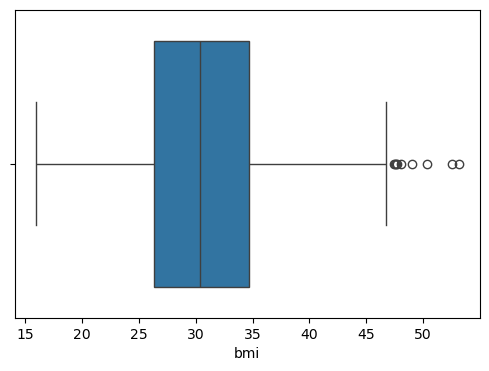

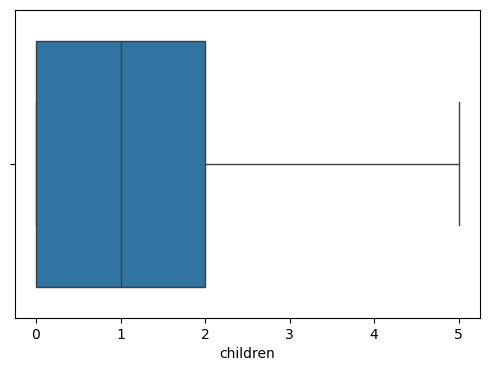

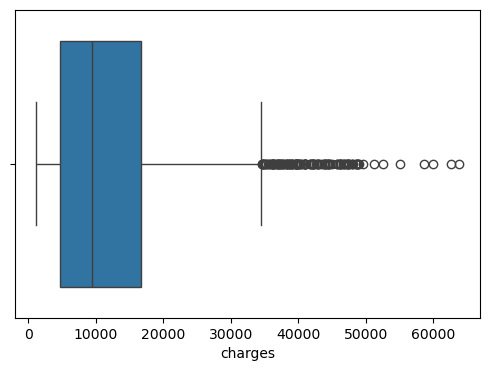

In [140]:
for i in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i])

<Axes: >

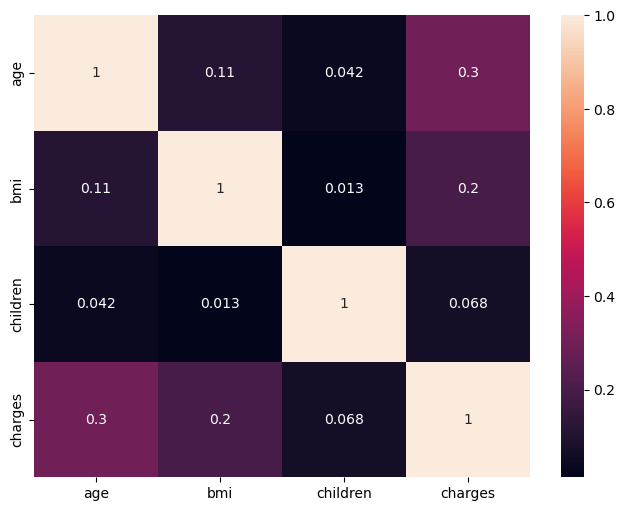

In [141]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True) , annot=True)

# Data Cleaning & Preprocessing

In [142]:
df.shape

(1338, 7)

In [143]:
df.drop_duplicates(inplace=True)

In [144]:
df.shape

(1337, 7)

In [145]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [146]:
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [147]:
# label encoding
df["sex"] = df["sex"].map({"male":0,"female":1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [148]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [149]:
df["smoker"] = df["smoker"].map({"yes":1 , "no":0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [150]:
df.rename(columns={
    "sex":"is_female",
   "smoker": "is_smoker"
},inplace=True)
df.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [151]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [152]:
# one hot encoding
df = pd.get_dummies(df,columns=["region"],drop_first=True)
df.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [153]:
df = df.astype(int)

In [154]:
df

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


<Axes: xlabel='bmi', ylabel='Count'>

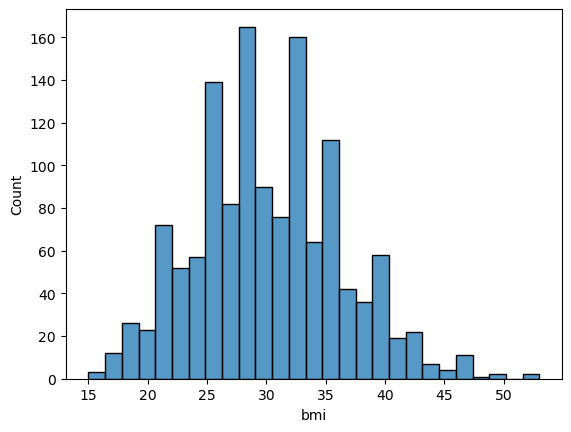

In [155]:
# Feature engineering and extraction
sns.histplot(df["bmi"])

In [156]:
df["bmi_category"] = pd.cut(df["bmi"],
                      bins=[0,18.5,24.9,29.9 , float("inf")],
                      labels=["Underweight", "Normal" , "Overweight" , "Obese"]
                      )


In [157]:
df.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [158]:
# one hot encoding
df = pd.get_dummies(df,columns=["bmi_category"],drop_first=True).astype(int)
df.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [159]:
df.dtypes

age                        int32
is_female                  int32
bmi                        int32
children                   int32
is_smoker                  int32
charges                    int32
region_northwest           int32
region_southeast           int32
region_southwest           int32
bmi_category_Normal        int32
bmi_category_Overweight    int32
bmi_category_Obese         int32
dtype: object

In [160]:
# standard scalling to lie btw 0 and 1 
from sklearn.preprocessing import StandardScaler
cols = ["age" , "children" , "bmi"]
scaler = StandardScaler()
df[cols]  = scaler.fit_transform(df[cols])

In [161]:
df.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


# Feature Extraction

In [162]:
# pearson corellation calculation
from scipy.stats import pearsonr , chi2_contingency

# i have to predict  'charges',
select_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']



In [163]:
correlation = {
    feature: pearsonr(df[feature] , df["charges"])[0] for feature in select_features
}

corr_df = pd.DataFrame(list(correlation.items()) , columns=["Feature" , "Pearson Coeff"]).sort_values(by="Pearson Coeff" , ascending=False)
corr_df

,Feature,Pearson Coeff
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [164]:
cat_features = [ "is_female" , "is_smoker",'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']
alpha = 0.05 
df["charges_bin"] = pd.qcut(df["charges"] , q=4  , labels=False)
df.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,charges_bin
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,3
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,3
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0


In [167]:
chi2_result = {}

for col in cat_features:
    contingency = pd.crosstab(df[col] , df["charges_bin"])
    chi2_stats , p_val , _ , _ = chi2_contingency(contingency)
    decision = "Reject - (Keep Feature)" if p_val < alpha else "Accept - (Drop Feature)"
    chi2_result[col] = {
        "chi2_stats":chi2_stats,
        "p_val":p_val,
        "decision":decision
    }


In [168]:
chi2_result

{'is_female': {'chi2_stats': 10.258784131896034,
  'p_val': 0.016489740254825688,
  'decision': 'Reject - (Keep Feature)'},
 'is_smoker': {'chi2_stats': 848.2191784691495,
  'p_val': 1.5074776554531109e-183,
  'decision': 'Reject - (Keep Feature)'},
 'region_northwest': {'chi2_stats': 1.1342403613235656,
  'p_val': 0.76881540917986,
  'decision': 'Accept - (Drop Feature)'},
 'region_southeast': {'chi2_stats': 15.998167448977355,
  'p_val': 0.0011349657141180658,
  'decision': 'Reject - (Keep Feature)'},
 'region_southwest': {'chi2_stats': 5.091893034250699,
  'p_val': 0.1651906331216363,
  'decision': 'Accept - (Drop Feature)'},
 'bmi_category_Normal': {'chi2_stats': 3.7080882993067794,
  'p_val': 0.29475953089283036,
  'decision': 'Accept - (Drop Feature)'},
 'bmi_category_Overweight': {'chi2_stats': 4.2514897526301425,
  'p_val': 0.23555707838052772,
  'decision': 'Accept - (Drop Feature)'},
 'bmi_category_Obese': {'chi2_stats': 8.515710780987105,
  'p_val': 0.03647336117085788,
  'd

In [ ]:
chi2_df = pd.DataFrame(chi2_result).T.sort_values("chi2_stats" , ascending=False)
chi2_df


,chi2_stats,p_val,decision
is_smoker,848.219178,0.0,Reject - (Keep Feature)
region_southeast,15.998167,0.001135,Reject - (Keep Feature)
is_female,10.258784,0.01649,Reject - (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject - (Keep Feature)
region_southwest,5.091893,0.165191,Accept - (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept - (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept - (Drop Feature)
region_northwest,1.13424,0.768815,Accept - (Drop Feature)


In [178]:
final_df  = df[ ['region_southeast', 
         'bmi_category_Obese', "bmi" , "age" , "is_smoker" , "is_female" , "children" ,  "charges"]]

In [180]:
final_df

,region_southeast,bmi_category_Obese,bmi,age,is_smoker,is_female,children,charges
0,0,0,-0.517949,-1.440418,1,1,-0.909234,16884
1,1,1,0.462463,-1.511647,0,0,-0.079442,1725
2,1,1,0.462463,-0.799350,0,0,1.580143,4449
3,0,0,-1.334960,-0.443201,0,0,-0.909234,21984
4,0,0,-0.354547,-0.514431,0,0,-0.909234,3866
...,...,...,...,...,...,...,...,...
1333,0,1,-0.027743,0.767704,0,0,1.580143,10600
1334,0,1,0.135659,-1.511647,0,1,-0.909234,2205
1335,1,1,0.952670,-1.511647,0,1,-0.909234,1629
1336,0,0,-0.844753,-1.297958,0,1,-0.909234,2007
